# DIVI-Plot
Plots the DIVI Intesivregister data
## Imports, Definitions

In [57]:
from sys import exit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.close("all")

dataFile = "/Users/cs/Desktop/Covid-Grafiken/DIVI-Rohdaten/zeitreihe-tagesdaten.csv"

HOCHTAUNUSKREIS = 6434
GEMEINDEN = [HOCHTAUNUSKREIS]

debugTable = True

HOCHTANUSKREIS = 6434
GEMEINDEN = [HOCHTANUSKREIS]

## Open DIVI CSV File

In [58]:

divi = pd.read_csv(dataFile, parse_dates=["date"])

if debugTable:
    divi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241598 entries, 0 to 241597
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   date                                  241598 non-null  datetime64[ns]
 1   bundesland                            241598 non-null  int64         
 2   gemeindeschluessel                    241598 non-null  int64         
 3   anzahl_standorte                      241598 non-null  int64         
 4   anzahl_meldebereiche                  241598 non-null  int64         
 5   faelle_covid_aktuell                  241598 non-null  int64         
 6   faelle_covid_aktuell_invasiv_beatmet  241598 non-null  int64         
 7   betten_frei                           241598 non-null  int64         
 8   betten_belegt                         241598 non-null  int64         
 9   betten_belegt_nur_erwachsen           241598 non-null  int6

## File Structure
### csv contents

Data columns (total 11 columns):

| #   | Spalte | Dtype  | Beispiel 1   | Beispiel 2   | Beispiel 3   |
|----:|:-------|:-------|:------------:|:------------:|:------------:|
|  0  | date   | datetime64[ns] | '2020-04-24' | '2020-04-25' | '2020-04-26' | 
|  1  | bundesland | int64 | 6 | 6 | 6 |
|  2  | gemeindeschluessel | int64 | 6463 | 6463 | 6463 |
|  3  | anzahl_standorte   | int64 | 3 | 3 | 3 |
|  4  | anzahl_meldebereiche | int64 | 3 | 3 | 3 |
|  5  | faelle_covid_aktuell | int64 | 5 | 4 | 6 |
|  6  | faelle_covid_aktuell_invasiv_beatmet | int64 | 1 | 1 | 2 |
|  7  | betten_frei | int64 | 4| 4 | 3 |
|  8  | betten_belegt  | int64 | 28| 27 | 27 |
| 10  | betten_belegt_nur_erwachsen  | int64 | 28| 27 | 27 |
|  9  | betten_frei_nur_erwachsen | int64 | 4| 4 | 3 

# Filter Only Interesting Rows

In [77]:
toPlot = divi[divi["gemeindeschluessel"].isin(GEMEINDEN) & (divi["date"] > pd.to_datetime('2021-03-01'))]


## Plot Data


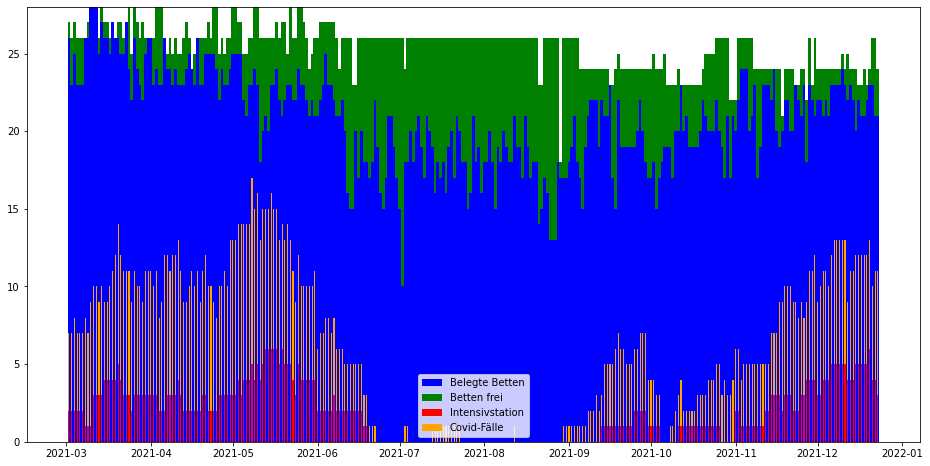

In [87]:
plt.rcParams["figure.figsize"] = (16,8)

fig, ax = plt.subplots()

p3 = ax.bar(toPlot['date'], toPlot['betten_belegt'], 1.0, label='Belegte Betten', color = 'blue')
p4 = ax.bar(toPlot['date'], toPlot['betten_frei'], 1.0, bottom=toPlot['betten_belegt'], label='Betten frei', color = 'green')

p1 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell_invasiv_beatmet'], 1.0, label='Intensivstation', color = 'red')
p2 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell'], 1.0, bottom=toPlot['faelle_covid_aktuell_invasiv_beatmet'], label='Covid-Fälle', color = 'orange')

leg = ax.legend(loc='lower center', frameon=True)

plt.show()
